In [1]:
import openreview
import pandas as pd
import datetime as date
import tqdm
import ast
from matplotlib import pyplot as plt

In [2]:
# df_all_notes = pd.read_csv('../data/submissions/df_all_notes.csv')
df_rr_politeness_score = pd.read_csv('../data/model_output/df_rr_politeness_score.csv')
df_author_profiles = pd.read_csv('../data/authors/df_author_profiles.csv')
df_submissions = pd.read_csv('../data/submissions/df_submissions.csv')
df_rr_all_features = pd.read_csv('../data/df_rr_all_features.csv')



In [3]:
df_author_profiles['gender']=df_author_profiles.gender.replace({'m':'Male',
                                    'M':'Male',
                                    'male':'Male',
                                    None:'Unspecified',
                                    '':'Unspecified',
                                    'Not Specified':'Unspecified',
                                    'female':'Female'})
#df_author_profiles.to_csv('../data/authors/df_author_profiles.csv')

In [4]:
df_author_profiles

,year,email,id,number,tcdate,tmdate,referent,packaging,invitation,readers,...,gender,gscholar,homepage,orcid,semanticScholar,location,institution,2017_position,2018_position,2019_position
0,2017,11112191@bjtu.edu.cn,~Liu_Yang1,NaN,1.512865e+12,1.563143e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Liu_Yang1']",...,Unspecified,NaN,NaN,NaN,NaN,China,Beijing Jiaotong University,NaN,NaN,NaN
1,2017,15112085@bjtu.edu.cn,~MiaoMiao_Cheng1,NaN,1.512865e+12,1.512865e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~MiaoMiao_Cheng1']",...,Unspecified,NaN,NaN,NaN,NaN,China,Beijing Jiaotong University,NaN,NaN,NaN
2,2017,AMagnani@walmartlabs.com,~Alessandro_Magnani1,NaN,1.512865e+12,1.563143e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Alessandro_Magnani1']",...,Unspecified,NaN,NaN,NaN,NaN,United States,walmartlabs.com,NaN,NaN,NaN
3,2017,Francis.wyffels@UGent.be,~Francis_wyffels1,NaN,1.512864e+12,1.512864e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Francis_wyffels1']",...,Unspecified,NaN,NaN,NaN,NaN,Belgium,UGent.be,NaN,NaN,NaN
4,2017,Mohammadi@uk.ac.ir,~Majid_Mohammadi1,NaN,1.512865e+12,1.512865e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Majid_Mohammadi1']",...,Unspecified,NaN,NaN,NaN,NaN,Iran,Shahid Bahonar University of Kerman,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,2019,zfw@pku.edu.cn,~fangwei_zhong1,NaN,1.538071e+12,1.629267e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~fangwei_zhong1']",...,Male,https://scholar.google.com/citations?user=ejDz...,NaN,NaN,NaN,China,Peking University,PhD student,PhD student,PhD student
8097,2019,zhangruimao@sensetime.com,~Ruimao_Zhang1,NaN,1.538027e+12,1.621516e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Ruimao_Zhang1']",...,Male,https://scholar.google.com/citations?user=ZJwZ...,http://zhangruimao.site/#,NaN,NaN,China,sensetime.com,NaN,Postdoc,Postdoc
8098,2019,zhaotianyang@pku.edu.cn,~Tianyang_Zhao1,NaN,1.562864e+12,1.562864e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Tianyang_Zhao1']",...,Unspecified,NaN,NaN,NaN,NaN,China,Peking University,NaN,NaN,NaN
8099,2019,zhifengc@google.com,~Zhifeng_Chen1,NaN,1.562863e+12,1.637083e+12,NaN,NaN,~/-/profiles,"['OpenReview.net', '~Zhifeng_Chen1']",...,Male,NaN,NaN,NaN,NaN,United States,google.com,Engineer,Engineer,Engineer


# This is to get the Keyword from the Submissions

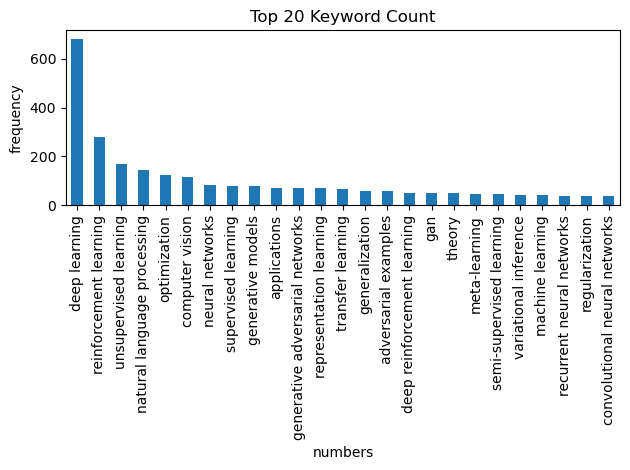

In [9]:
df_submissions.keywords.to_list()

list_keyword_list = [ast.literal_eval(list) for list in df_submissions.keywords.to_list()]

list_keywords = [item.lower() for sublist in list_keyword_list for item in sublist]


#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()



df = pd.DataFrame({'keywords': list_keywords})
df['keywords'].value_counts().nlargest(25).plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Top 20 Keyword Count')

plt.show()

In [13]:
len(set(list_keywords))

3883

# Get the gender from the profile of the Authors

In [49]:
def perecent_female_author(row):
    try:
        lst_authorids = ast.literal_eval(row['authorids'])
        int_author_number=len(lst_authorids)
        #print(lst_authorids)
    except:
        return None
    count = 0
    for authorid in lst_authorids:
        #print(authorid)
        try:
            gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()
        except:
            return None
        #print(authorid," ",gender_id)
        if gender_id == 'female':
            count += 1
            #print(count)
        if gender_id == "unspecified":
            #print(gender_id)
            return None
    return count/int_author_number
    
def get_all_male_authors(row):
    try:
        lst_authorids = ast.literal_eval(row['authorids'])
        int_author_number=len(lst_authorids)
        #print(lst_authorids)
    except:
        return None
    count = 0
    for authorid in lst_authorids:
        #print(authorid)
        try:
            gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()
        except:
            return None
        #print(authorid," ",gender_id)
        if gender_id == 'female':
            return 0
            #print(count)
        if gender_id == "unspecified":
            #print(gender_id)
            return None
    return 1   

def get_last_author_gender(row):
    try:
        last_author_email =str(row['last_author_email'])
        return str(df_author_profiles[df_author_profiles['email'] == last_author_email].gender.values[0]).lower()
    except:
        return None

def get_first_author_gender(row):
    try:
        first_author_email =str(row['first_author_email'])
        return str(df_author_profiles[df_author_profiles['email'] == first_author_email].gender.values[0]).lower()
    except:
        return None
    

In [45]:
test_row = df_submissions[df_submissions['forum']=="HJTzHtqee"]


test_row.apply(lambda x: perecent_female_author(x),axis=1)



t = '''
for i in test_row['authorids']:
    lst_authorids = ast.literal_eval(i)
    int_author_number=len(lst_authorids)
    count = 0
    for authorid in lst_authorids:
        gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()

        if gender_id == 'female':
            count += 1
    out = count/int_author_number
print(out)'''

test_row.apply(lambda x: perecent_female_author(x),axis=1)

94    0.5
dtype: float64

In [50]:
tqdm.tqdm.pandas()

df_rr_all_features['gender_percent'] = df_rr_all_features.progress_apply(lambda x: perecent_female_author(x),axis = 1)
df_rr_all_features['last_author_gender'] = df_rr_all_features.progress_apply(lambda x: get_last_author_gender(x),axis = 1)
df_rr_all_features['all_male'] = df_rr_all_features.progress_apply(lambda x: get_all_male_authors(x),axis = 1)
df_rr_all_features.to_csv('../data/df_rr_all_features.csv',index=False)

100%|███████████████████████████████████| 22878/22878 [00:18<00:00, 1221.47it/s]


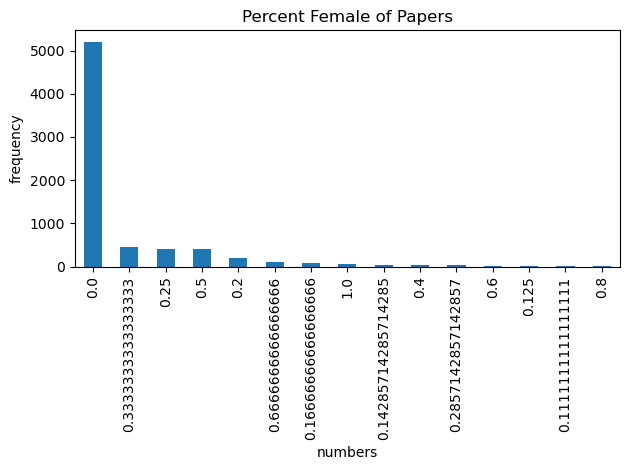

In [39]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_rr_all_features['gender_percent'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Percent Female of Papers')

plt.show()

# Submission Level data

In [40]:
def lambda_get_first_last_author(row):
    first_author_name = str()
    first_author_id = str()
    last_author_name = str()
    last_author_id = str()
    try:
        lst_names = ast.literal_eval(row['authors'])
        lst_ids = ast.literal_eval(row['authorids'])
        first_author_name = lst_names[0]
        last_author_name = lst_names[-1]
        first_author_id = lst_ids[0]
        last_author_id = lst_ids[-1]
    except:
        first_author_name = 'error'
        last_author_name = 'error'
        first_author_id = 'error'
        last_author_id = 'error'
        
    return first_author_name, last_author_name, first_author_id, last_author_id

df_submissions[['first_author_name','last_author_name','first_author_email','last_author_email']] = df_submissions.apply(lambda x: lambda_get_first_last_author(x), axis = 1 , result_type='expand')

df_submissions.to_csv('../data/submissions/df_submissions.csv')

In [53]:
df_submissions['gender_percent'] = df_submissions.progress_apply(lambda x: perecent_female_author(x),axis = 1)
df_submissions['last_author_gender'] = df_submissions.progress_apply(lambda x: get_last_author_gender(x),axis = 1)
df_submissions['first_author_gender'] = df_submissions.progress_apply(lambda x: get_first_author_gender(x),axis = 1)
df_submissions['all_male_authors'] = df_submissions.progress_apply(lambda x: get_all_male_authors(x),axis = 1)
df_submissions.to_csv('../data/submissions/df_submissions.csv', index=False)

100%|█████████████████████████████████████| 2820/2820 [00:02<00:00, 1288.56it/s]


In [52]:
df_submissions

,Unnamed: 0,id,original,number,cdate,mdate,tcdate,tmdate,ddate,forum,...,code,data,first_author_name,last_author_name,first_author_email,last_author_email,gender_percent,last_author_gender,first_author_gender,all_male_authors
0,0,S1VaB4cex,NaN,214,NaN,NaN,1478276540541,1658433096672,NaN,S1VaB4cex,...,NaN,NaN,Gustav Larsson,Gregory Shakhnarovich,larsson@cs.uchicago.edu,greg@ttic.edu,0.0,male,male,1.0
1,1,H1W1UN9gg,NaN,215,NaN,NaN,1478276569300,1658433096913,NaN,H1W1UN9gg,...,NaN,NaN,Samuel S. Schoenholz,Jascha Sohl-Dickstein,schsam@google.com,jaschasd@google.com,0.0,male,male,1.0
2,2,r1GKzP5xx,NaN,370,NaN,NaN,1478287994558,1658434077890,NaN,r1GKzP5xx,...,NaN,NaN,César Laurent,Pascal Vincent,cesar.laurent@umontreal.ca,pascal.vincent@umontreal.ca,NaN,male,male,NaN
3,3,S1J0E-71l,NaN,2,NaN,NaN,1476756679535,1658433097410,NaN,S1J0E-71l,...,NaN,NaN,error,error,error,error,NaN,None,None,NaN
4,4,SJGCiw5gl,NaN,427,NaN,NaN,1478290378652,1658433097637,NaN,SJGCiw5gl,...,NaN,NaN,Pavlo Molchanov,Jan Kautz,pmolchanov@nvidia.com,jkautz@nvidia.com,NaN,unspecified,male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,2815,BkE8NjCqYm,Hyxdt-7YYm,6,1.538088e+12,NaN,1538087726374,1545355398839,NaN,BkE8NjCqYm,...,NaN,NaN,Eldan Cohen,J. Christopher Beck,ecohen@mie.utoronto.ca,jcb@mie.utoronto.ca,NaN,male,unspecified,NaN
2816,2816,BJfIVjAcKm,SJl8QZNFKm,4,1.538088e+12,NaN,1538087725988,1644492706715,NaN,BJfIVjAcKm,...,[![github](/images/github_icon.svg) MadryLab/r...,NaN,Kai Y. Xiao,Aleksander Madry,kaix@mit.edu,madry@mit.edu,NaN,male,unspecified,NaN
2817,2817,Hkl84iCcFm,HygqaYAcFm,3,1.538088e+12,NaN,1538087725796,1545355412821,NaN,Hkl84iCcFm,...,NaN,NaN,Fereshteh Lagzi,Fereshteh Lagzi,lagzi@informatik.uni-freiburg.de,lagzi@informatik.uni-freiburg.de,1.0,female,female,0.0
2818,2818,S1gUVjCqKm,HyenhvCqKX,2,1.538088e+12,NaN,1538087725593,1545355420919,NaN,S1gUVjCqKm,...,NaN,NaN,Sungyeob Han,Jungwoo Lee,syhan@cml.snu.ac.kr,junglee@snu.ac.kr,NaN,male,male,NaN


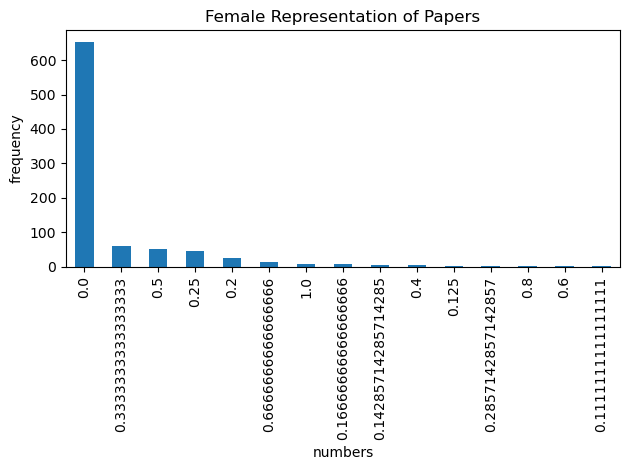

In [47]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_submissions['gender_percent'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Female Representation of Papers')

plt.show()

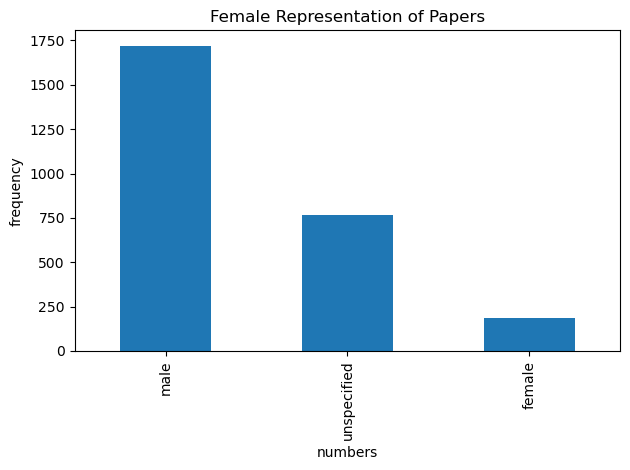

In [48]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_submissions['last_author_gender'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Female Representation of Papers')

plt.show()

In [59]:
str_2017 = 'ICLR.cc/2017/conference/-/submission'
str_2018 = 'ICLR.cc/2018/Conference/-/Blind_Submission'
str_2019 = 'ICLR.cc/2019/Conference/-/Blind_Submission'


df_submissions_2017 = df_submissions[df_submissions['invitation'] == str_2017]
df_submissions_2018 = df_submissions[df_submissions['invitation'] == str_2018]
df_submissions_2019 = df_submissions[df_submissions['invitation'] == str_2019]


df_submissions_2017['title'] = df_submissions_2017['title'].str.lower()
df_submissions_2018['title'] = df_submissions_2018['title'].str.lower()
df_submissions_2019['title'] = df_submissions_2019['title'].str.lower()

/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submissions_2017['title'] = df_submissions_2017['title'].str.lower()
/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submissions_2018['title'] = df_submissions_2018['title'].str.lower()
/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:13: SettingWithCopyWarning: 
A 

In [62]:
df_submissions_2017.merge(df_submissions_2018, how='inner', on='title')


df_submissions_2018.merge(df_submissions_2019, how='inner', on='title')

,Unnamed: 0_x,id_x,original_x,number_x,cdate_x,mdate_x,tcdate_x,tmdate_x,ddate_x,forum_x,...,author_emails_y,code_y,data_y,first_author_name_y,last_author_name_y,first_author_email_y,last_author_email_y,gender_percent_y,last_author_gender_y,first_author_gender_y
0,530,SyBBgXWAZ,HJbJe7-Cb,1101,1.518730e+12,NaN,1509138495670,1644492600111,NaN,SyBBgXWAZ,...,NaN,NaN,NaN,Eirikur Agustsson,Luc Van Gool,aeirikur@vision.ee.ethz.ch,vangool@vision.ee.ethz.ch,NaN,unspecified,unspecified
1,542,SJvu-GW0b,HkL_bGWA-,777,1.518730e+12,NaN,1509134702756,1518730165569,NaN,SJvu-GW0b,...,NaN,NaN,NaN,Shaileshh Bojja Venkatakrishnan,Pramod Viswanath,bjjvnkt@csail.mit.edu,pramodv@illinois.edu,NaN,male,unspecified
2,956,Bya8fGWAZ,H1h8MG-AW,792,1.518730e+12,NaN,1509134933264,1518730164999,NaN,Bya8fGWAZ,...,NaN,NaN,NaN,Nantas Nardelli,Nicolas Usunier,nantas@robots.ox.ac.uk,usunier@fb.com,0.0,unspecified,male
3,1088,HyBbjW-RW,S1LejWW0b,708,1.518730e+12,NaN,1509133053452,1518730167722,NaN,HyBbjW-RW,...,NaN,NaN,NaN,Jesse Dodge,Noah Smith,jessed@cs.cmu.edu,nasmith@cs.washington.edu,0.0,male,male
4,1174,S1Y7OOlRZ,HyYQO_gCZ,312,1.518730e+12,NaN,1509095457529,1518730182110,NaN,S1Y7OOlRZ,...,NaN,NaN,NaN,Liam Li,Ameet Talwalkar,jamieson@cs.washington.edu,talwalkar@cmu.edu,0.0,male,male


# Repeat Authors

In [67]:
df_authors_2017 = df_author_profiles[df_author_profiles['year'] == 2017]
df_authors_2018 = df_author_profiles[df_author_profiles['year'] == 2018]
df_authors_2019 = df_author_profiles[df_author_profiles['year'] == 2019]

In [70]:
df_repeat_authors = df_authors_2017.merge(df_authors_2017, how='inner', on='id')
df_repeat_authors = df_repeat_authors.merge(df_authors_2019, how='inner', on='id')
df_repeat_authors.to_csv('../data/authors/df_repeat_author_profiles.csv')